In [1]:
import ast
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

import numpy as np

import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

from sklearn.cluster import DBSCAN
from sklearn.datasets import( load_iris, load_digits, fetch_lfw_people )
from sklearn.ensemble import( AdaBoostClassifier, AdaBoostRegressor, ExtraTreesClassifier, 
                              GradientBoostingClassifier,RandomForestClassifier, StackingClassifier )

import plotly.figure_factory as ff
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
from sklearn.impute import( KNNImputer, SimpleImputer )
                             
from sklearn.neighbors import ( KNeighborsClassifier, NearestNeighbors )

from scipy.stats import mode 

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import warnings
warnings.filterwarnings( "ignore", category=DeprecationWarning ) # to avoid deprecation warnings

# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template( layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6",
                                                              "#2A7FAF", "#23B1AB", "#0E3449", "#015955"] )
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JUPITER or "iframe_connected" or "notebook"

from xgboost import XGBRegressor

In [2]:
dataset = pd.read_csv("src/dataset.csv")

print(dataset['Year'].unique())
print(dataset['Month'].unique())

dataset = dataset.drop(columns=['Year'])

[2014]
[6 4 8 7 5 9]


In [3]:
dataset = dataset.drop(columns=['Affiliated_base_num','Borough', 'Zone', 'Month', 'Day', 'Hour', 'Minute'])

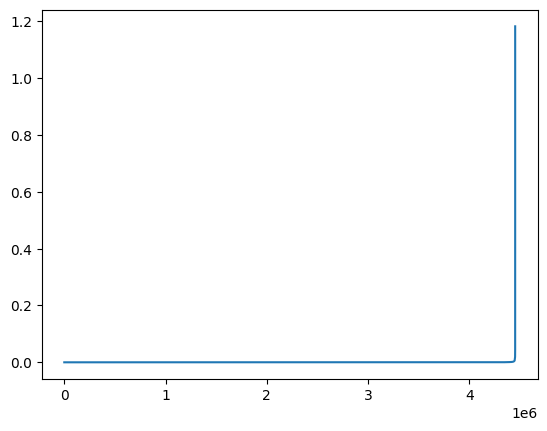

In [4]:
# Check Nearest Neighbors for define epsilon (+/- 90 %)
# http://datascientest.com/machine-learning-clustering-dbscan
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(dataset)
distances, indices = nbrs.kneighbors(dataset)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances);

In [5]:
dataset_DBScan = dataset
# Epsilon = distance neighbors
# Minimum Samples = min numbers of point for create a viable group 

# Instanciate DBSCAN 
db = DBSCAN(eps=0.1, min_samples=100, metric="euclidean", algorithm="brute", n_jobs=-1)

In [6]:
#dataset_DBScan_cp = pd.DataFrame( data=[], columns= dataset_DBScan.columns.to_list().append('Cluster'))

for dayofWeek in range(0,1):
    dataToTrain = dataset_DBScan[dataset_DBScan['DayOfWeek'] == dayofWeek]
    dataToTrain = dataToTrain.drop(columns=['DayOfWeek'])
    dataToTrain = dataToTrain.sample(10_000)
    # Fit on data 
    ## No need to normalize data, it already is! 
    db.fit(dataset_DBScan)

    dataToTrain['Cluster'] = db.labels_
    dataToTrain['DayOfWeek'] = dayofWeek
    
    print(dataset_DBScan['Cluster'].unique())
    print(len(dataset_DBScan['Cluster'].unique()))

    #dataset_DBScan_cp = pd.concat([dataset_DBScan_cp, dataToTrain])
    #print(f'Done... {dayofWeek+1}/7')
    

    fig = px.scatter_mapbox(dataset_DBScan, 
                        lat="Lat", lon="Lon", 
                        color="Cluster", zoom =10,
                        #animation_frame= "DayOfWeek",
                        center= {'lat': dataset_DBScan['Lat'].mean(), 
                                    'lon': dataset_DBScan['Lon'].mean()},
                        mapbox_style="carto-positron",
                        title= f"Uber city point : {dayofWeek+1}",
                        #hover_data=['DayOfWeek'],
                        color_continuous_scale = 'sunset',
                        width=800, height=600)
    
    #fig.write_html('test.html')
    fig.show('notebook')

#dataset_DBScan = dataset_DBScan_cp

KeyboardInterrupt: 

In [ ]:
dataset_DBScan = dataset_DBScan.sample(1000)

fig = px.scatter_mapbox(dataset_DBScan, 
                        lat="Lat", lon="Lon", 
                        color="Cluster", zoom =10,
                        animation_frame= "DayOfWeek",
                        center= {'lat': dataset_DBScan['Lat'].mean(), 
                                    'lon': dataset_DBScan['Lon'].mean()},
                        mapbox_style="carto-positron",
                        title= f"Uber city point",
                        hover_data=['DayOfWeek'],
                        color_continuous_scale = 'sunset',
                        width=800, height=600)
    
#fig.write_html('test.html')
fig.show('notebook')